In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
data = pd.read_csv("Titanic/train.csv")
data.shape

(891, 12)

In [128]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

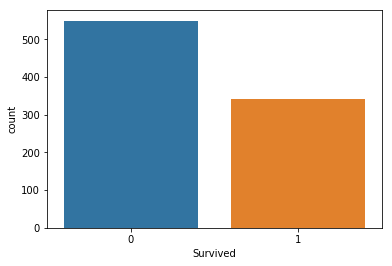

In [132]:
sns.countplot(data["Survived"])

less people survived the accident

In [133]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [134]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


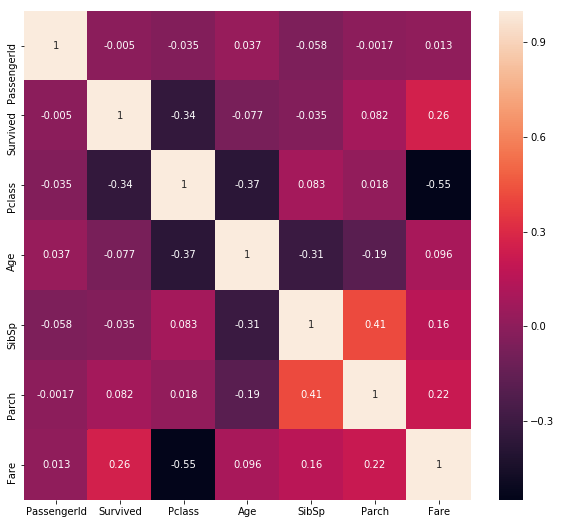

In [135]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True)

### Detecting Missing values

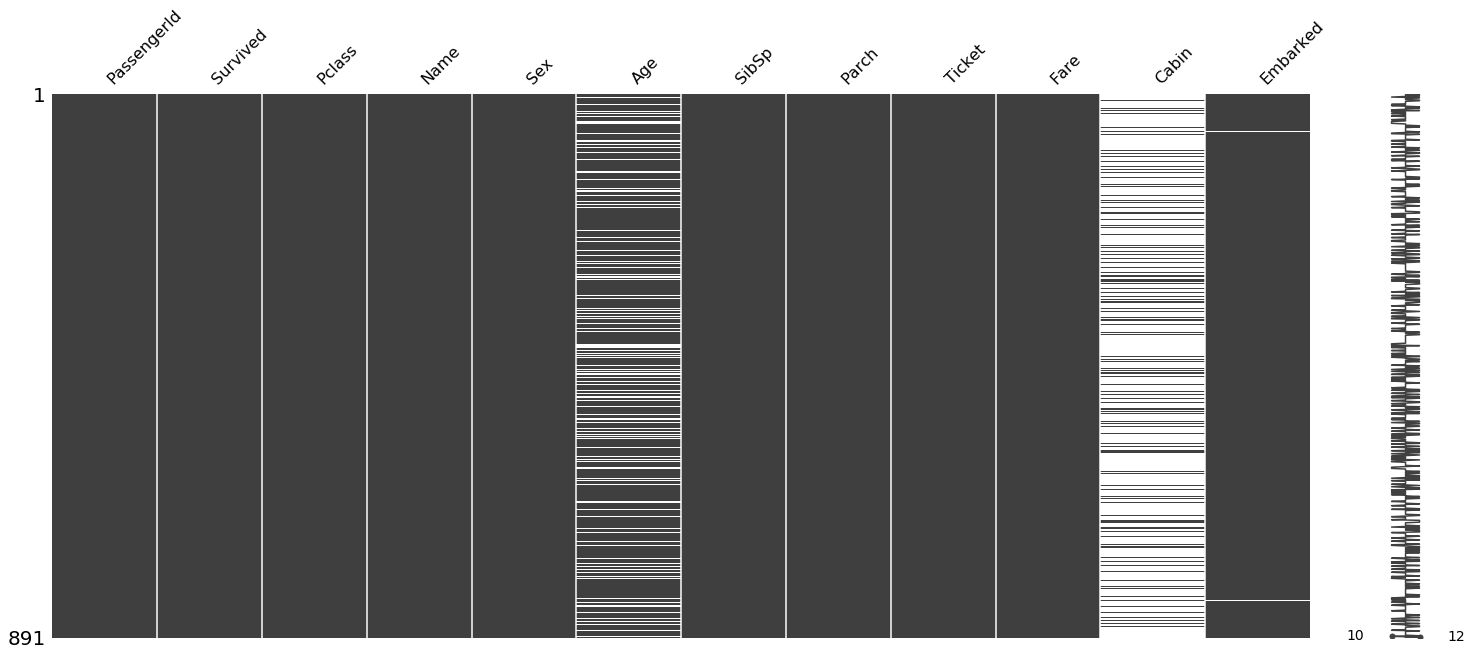

In [136]:
import missingno as msno
msno.matrix(data)

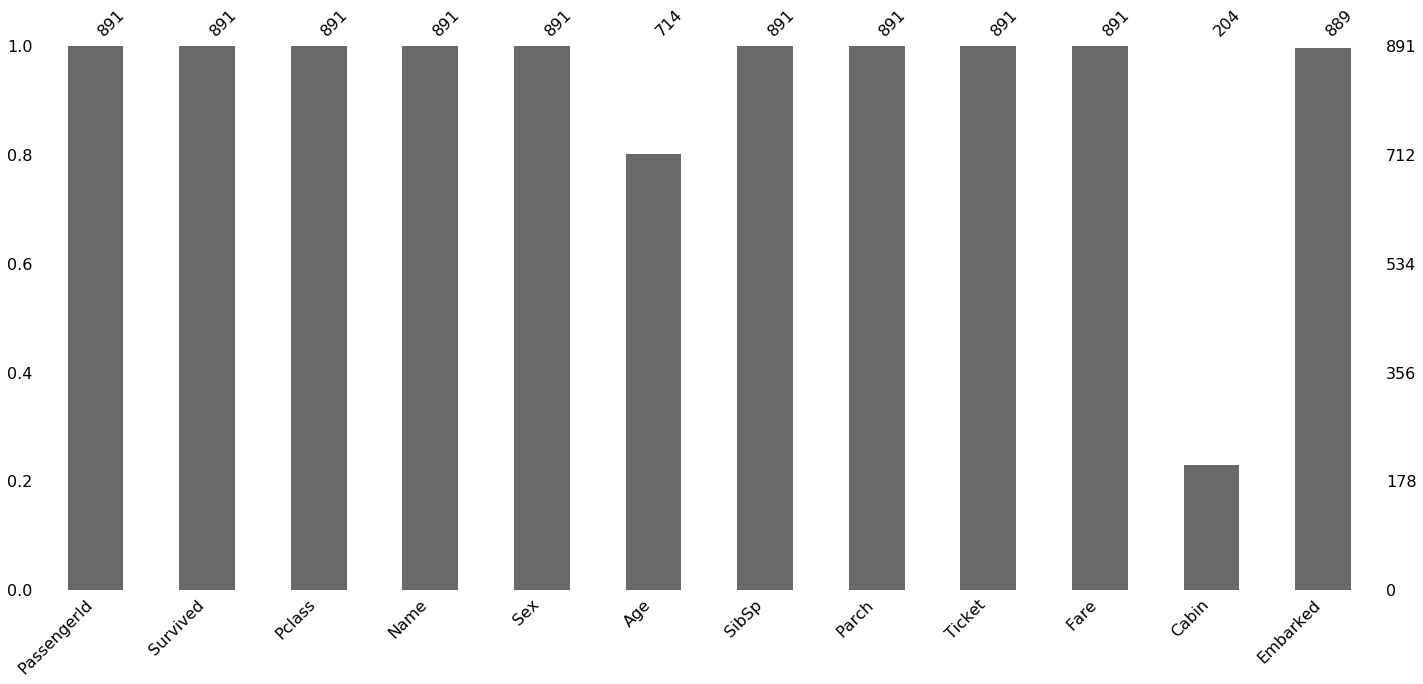

In [137]:
msno.bar(data)

In [138]:
percent_missing = round(data.isnull().sum() * 100 / len(data))
percent_missing

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [139]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
num_cols = data.select_dtypes(exclude=object)
num_cols = num_cols.drop(['SibSp','Age'],axis=1)

In [141]:
num_cols

,PassengerId,Survived,Pclass,Parch,Fare
0,1,0,3,0,7.2500
1,2,1,1,0,71.2833
2,3,1,3,0,7.9250
3,4,1,1,0,53.1000
4,5,0,3,0,8.0500
...,...,...,...,...,...
886,887,0,2,0,13.0000
887,888,1,1,0,30.0000
888,889,0,3,2,23.4500
889,890,1,1,0,30.0000


In [142]:
cat_cols = data.select_dtypes(include=object)

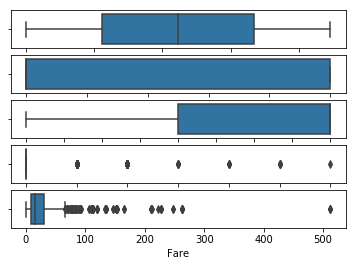

In [143]:
for i in range(len(num_cols.columns)):
    #plt.figure(figsize=(3,2))
    plt.subplot(5,1,i+1)
    sns.boxplot(data[num_cols.columns[i]])

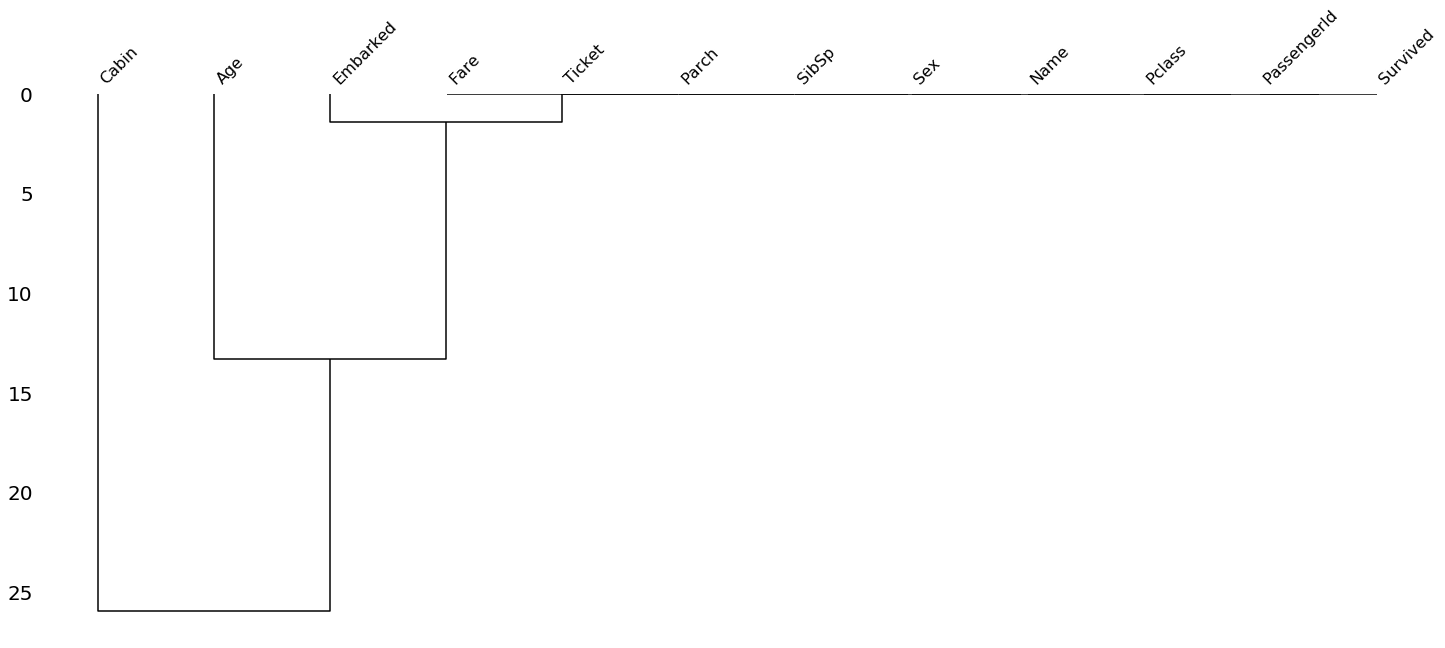

In [144]:
msno.dendrogram(data) #A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

In [145]:
data_imputing = data.copy()

In [146]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data1 = imputer.fit_transform(data_imputing)

In [147]:
data1

array([[1, 0, 3, ..., 7.25, 'B96 B98', 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, 'B96 B98', 'S'],
       ...,
       [889, 0, 3, ..., 23.45, 'B96 B98', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, 'B96 B98', 'Q']], dtype=object)

In [156]:
data["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [151]:
df = pd.DataFrame(data1,columns=data.columns)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C
